---
# **Estatística no Mercado Financeiro na Prática**
---

Aplicaremos de forma prática e com ativos financeiros reais os seguintes conceitos de estatística:

- Histograma e distribuições

- Boxplot

- Quantile-Quantile Plot (Q-Q plot)

- Skewness

- Kurtosis

- Manipulação de dados de Preço e Dividendos

- Correlação


# *Instalações*

In [2]:
!pip install sweetviz
!pip install vectorbt
!pip install yfinance

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Using cached sweetviz-2.3.1-py3-none-any.whl.metadata (24 kB)
  Obtaining dependency information for importlib-resources>=1.2.0 from https://files.pythonhosted.org/packages/f3/3e/a01c6de9853a7d73672926e01966f979723386f0ba83d62e5db3cdf4c097/importlib_resources-6.1.3-py3-none-any.whl.metadata
Using cached sweetviz-2.3.1-py3-none-any.whl (15.1 MB)


# *Importações*

In [124]:
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import sweetviz as sv
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from scipy import stats
import pylab
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# *Checando medidas de posição de dispersão nos dados*

<br>


Iremos verificar como as metricas se comportam em dados de ativos reais.

<br>

Estudos de caso:
    
1. Preços BPAC3
2. Preços e retornos do IBOVESPA
3. Dividendos
4. Arbitragem em ações Preferenciais e Ordinária

# *Preços BPAC3*

<br>

- A extrção será feita através da biblioteca do Yahoo Finance (Yfinance)

In [47]:
btg_data = yf.download(('BPAC3' + '.SA'), period = 'max')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [48]:
btg_data.head()

Date
2016-07-11    0.860996
2016-07-12    0.860996
2016-07-13    0.860996
2016-07-14    0.860996
2016-07-15    0.860996
Name: Adj Close, dtype: float64

In [49]:
btg_data.index

DatetimeIndex(['2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14',
               '2016-07-15', '2016-07-18', '2016-07-19', '2016-07-20',
               '2016-07-21', '2016-07-22',
               ...
               '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29',
               '2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-08'],
              dtype='datetime64[ns]', name='Date', length=1908, freq=None)

Alterando indice para datetime UTC

In [50]:
btg_data.index = pd.to_datetime(btg_data.index, utc = True)

In [51]:
btg_data = pd.DataFrame(btg_data)

In [53]:
btg_data['Retorno diário'] = btg_data['Adj Close'].pct_change()

In [55]:
btg_data.dropna(inplace = True)

In [66]:
btg_data.tail()

,Adj Close,Retorno diário
Date,,
2024-03-04 00:00:00+00:00,17.600000,0.001707
2024-03-05 00:00:00+00:00,17.270000,-0.018750
2024-03-06 00:00:00+00:00,17.129999,-0.008107
2024-03-07 00:00:00+00:00,17.049999,-0.004670
2024-03-08 00:00:00+00:00,17.190001,0.008211


# Agora vamos criar um histograma com os dados de fechamento diário do BTG

In [32]:
# Gerando valores do histograma
go.Histogram(x=btg_data)

Histogram({
    'x': array([ 0.86099637,  0.86099637,  0.86099637, ..., 17.12999916,
          17.04999924, 17.03000069])
})

In [77]:
# Criando uma figura

fig_01 = make_subplots(rows = 1, cols = 2)
fig_01.add_trace(go.Histogram(x=btg_data['Adj Close']), row=1, col=1)
fig_01.add_vline(x=np.mean(btg_data['Adj Close']), line_width=3, line_color='blue', row=1,col=1)
fig_01.add_vline(x=np.median(btg_data['Adj Close']), line_width=3, line_dash='dash', line_color='green',row=1, col=1)

fig_01.add_trace(go.Box(y=btg_data['Adj Close'], boxpoints='all', boxmean='sd',),row=1,col=2)

fig_01.update_layout(title_text = 'BTG', width=600, height=300, template = 'simple_white',
                    paper_bgcolor='#f7f8fa', margin = dict(l=20,r=20,t=20,b=20),
                    showlegend=True)


# *Preços e Retornos IBOVESPA*


In [93]:
ibov = yf.download('^BVSP', period ='max')['Close']

[*********************100%%**********************]  1 of 1 completed


In [94]:
ibov

Date
1993-04-27        24.500000
1993-04-28        24.299999
1993-04-29        23.700001
1993-04-30        24.100000
1993-05-03        24.100000
                  ...      
2024-03-04    128341.000000
2024-03-05    128098.000000
2024-03-06    128890.000000
2024-03-07    128340.000000
2024-03-08    127247.156250
Name: Close, Length: 7640, dtype: float64

In [95]:
ibov.index = pd.to_datetime(ibov.index, utc = True)

In [96]:
ibov

Date
1993-04-27 00:00:00+00:00        24.500000
1993-04-28 00:00:00+00:00        24.299999
1993-04-29 00:00:00+00:00        23.700001
1993-04-30 00:00:00+00:00        24.100000
1993-05-03 00:00:00+00:00        24.100000
                                 ...      
2024-03-04 00:00:00+00:00    128341.000000
2024-03-05 00:00:00+00:00    128098.000000
2024-03-06 00:00:00+00:00    128890.000000
2024-03-07 00:00:00+00:00    128340.000000
2024-03-08 00:00:00+00:00    127247.156250
Name: Close, Length: 7640, dtype: float64

In [98]:
ibov = pd.DataFrame(ibov)

In [100]:
ibov['Returns'] = ibov['Close'].pct_change()

In [101]:
ibov

,Close,Returns
Date,,
1993-04-27 00:00:00+00:00,24.500000,NaN
1993-04-28 00:00:00+00:00,24.299999,-0.008163
1993-04-29 00:00:00+00:00,23.700001,-0.024691
1993-04-30 00:00:00+00:00,24.100000,0.016878
1993-05-03 00:00:00+00:00,24.100000,0.000000
...,...,...
2024-03-04 00:00:00+00:00,128341.000000,-0.006495
2024-03-05 00:00:00+00:00,128098.000000,-0.001893
2024-03-06 00:00:00+00:00,128890.000000,0.006183


In [102]:
ibov.dropna(inplace=True)

In [103]:
ibov

,Close,Returns
Date,,
1993-04-28 00:00:00+00:00,24.299999,-0.008163
1993-04-29 00:00:00+00:00,23.700001,-0.024691
1993-04-30 00:00:00+00:00,24.100000,0.016878
1993-05-03 00:00:00+00:00,24.100000,0.000000
1993-05-04 00:00:00+00:00,24.900000,0.033195
...,...,...
2024-03-04 00:00:00+00:00,128341.000000,-0.006495
2024-03-05 00:00:00+00:00,128098.000000,-0.001893
2024-03-06 00:00:00+00:00,128890.000000,0.006183


# *Plotando Histograma dos preços de fechamento do IBOVESPA*

In [107]:
fig_02 = px.histogram(ibov['Close'], color_discrete_sequence=['lightseagreen'])

fig_02.add_vline(x=np.mean(ibov['Close']), line_width=3, line_color='red')
fig_02.add_vline(x=np.median(ibov['Close']), line_width=3, line_dash='dash', line_color='red')

fig_02.update_layout(width=600, height=400, template = 'simple_white',
                    paper_bgcolor = '#f7f8fa', margin=dict(l=20, r=20, t=20, b=20),
                    showlegend= True)

*Acima podemos ver que os preços de fechamento do IBOVESPA apresentam uma Distribuição trimodal, com três picos.*

# *Quantile-Quantile Plot (Q-Q plot) preços de fechamento IBOVESPA*

<BR>
    
- *Q-Q plot é uma ferramenta visual poderosa para avaliar a adequação de uma distribuição teórica aos seus dados observados. Ele fornece uma maneira intuitiva de detectar desvios da distribuição esperada e pode ajudar na escolha do modelo estatístico apropriado.*
    
<BR> 

- **Alinhamento com a linha diagonal:** *Se os pontos no gráfico estiverem aproximadamente alinhados com a linha diagonal, isso sugere que os dados observados seguem de perto a distribuição teórica escolhida. Isso indica uma boa concordância entre os seus dados e a distribuição de referência.*

<BR>
   
- **Desvio da linha diagonal:** *Se os pontos divergirem da linha diagonal de várias maneiras, isso pode indicar que os seus dados não seguem a distribuição teórica escolhida.*

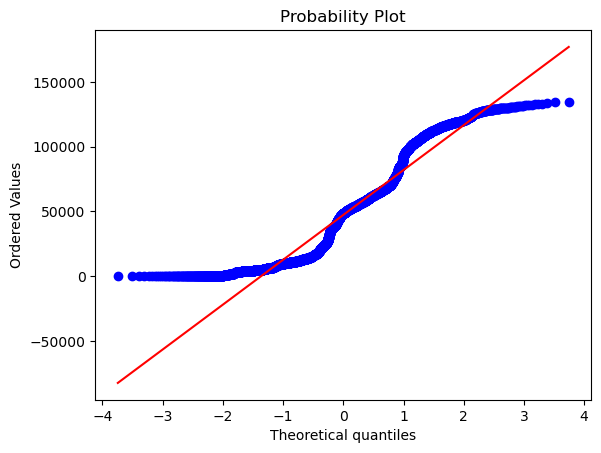

In [112]:
stats.probplot(ibov['Close'], dist='norm', plot=pylab)
pylab.show()

# *Plotando Histograma dos retornos diários do IBOVESPA*

In [108]:
fig_02 = px.histogram(ibov['Returns'], color_discrete_sequence=['lightseagreen'])

fig_02.add_vline(x=np.mean(ibov['Returns']), line_width=3, line_color='red')
fig_02.add_vline(x=np.median(ibov['Returns']), line_width=3, line_dash='dash', line_color='red')

fig_02.update_layout(width=600, height=400, template = 'simple_white',
                    paper_bgcolor = '#f7f8fa', margin=dict(l=20, r=20, t=20, b=20),
                    showlegend= True)

Acima podemos ver que os preços de retorno diário do IBOVESPA apresentam oque parece ser uma Distribuição Normal, tendendo um pouco acima de zero.

# *Quantile-Quantile Plot (Q-Q plot) Retornos diários do IBOVESPA*

<BR>
    
- *Q-Q plot é uma ferramenta visual poderosa para avaliar a adequação de uma distribuição teórica aos seus dados observados. Ele fornece uma maneira intuitiva de detectar desvios da distribuição esperada e pode ajudar na escolha do modelo estatístico apropriado.*
    
<BR> 

- **Alinhamento com a linha diagonal:** *Se os pontos no gráfico estiverem aproximadamente alinhados com a linha diagonal, isso sugere que os dados observados seguem de perto a distribuição teórica escolhida. Isso indica uma boa concordância entre os seus dados e a distribuição de referência.*

<BR>
   
- **Desvio da linha diagonal:** *Se os pontos divergirem da linha diagonal de várias maneiras, isso pode indicar que os seus dados não seguem a distribuição teórica escolhida.*

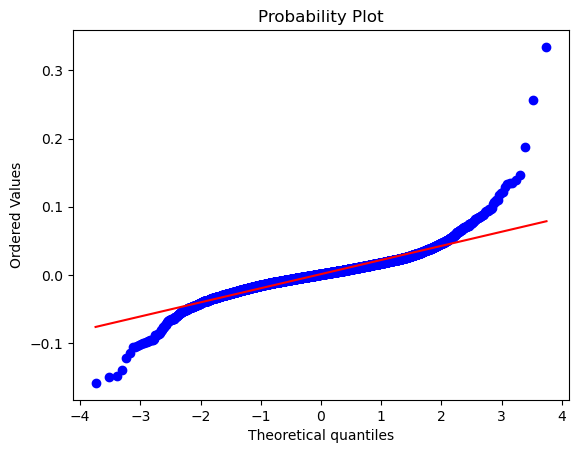

In [114]:
stats.probplot(ibov['Returns'], dist='norm', plot=pylab)
pylab.show()

---
# Skewness e Kurtosis

Enquanto a Skewness se concentra na propagação (caudas) da distribuição normal, a Kurtosis se concentra mais na altura. Ele nos diz quão alta ou plana é nossa distribuição normal (ou semelhante à normal) .

<br>

**Distribuições:**

<br>

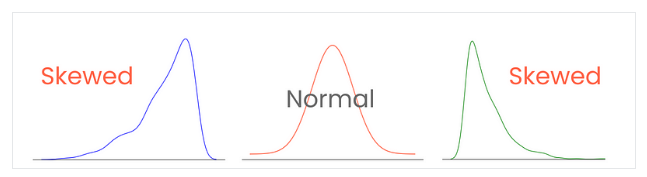


### Skewness

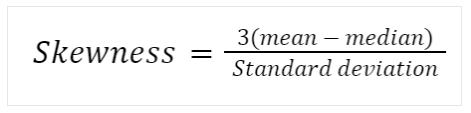

<br>

**Skewness (Assimetria):**

- *A skewness é uma medida que descreve a assimetria da distribuição de dados.*

<br>

- *Em uma distribuição simétrica, os valores são distribuídos igualmente em ambos os lados da média, e a skewness é próxima de zero.*

<br>

- *Quando a distribuição é deslocada para a direita (valores mais altos concentrados à esquerda da média), dizemos que é uma skewness positiva.*

<br>

- *Quando a distribuição é deslocada para a esquerda (valores mais altos concentrados à direita da média), dizemos que é uma skewness negativa.*

In [115]:
# Skewness Fechamento IBOVESPA
stats.skew(ibov['Close'])

0.5303987846254486

 A Skewness da distribuição dos dados Fechamento do IBOV acima indica uma assimetria positiva. 

In [131]:
# Skewness Retornos IBOVESPA
stats.skew(ibov['Returns'])

0.8310670903721699

A Skewness da distribuição dos dados Retorno do IBOV acima também indicam uma assimetria positiva.

###  Kurtosis

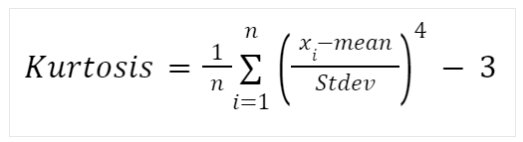

<br>

**Kurtosis (Curtose):**

- *A kurtosis é uma medida que descreve o achatamento ou a forma das caudas de uma distribuição em relação à distribuição normal.*

<br>

- *Uma kurtosis alta indica que a distribuição tem caudas mais pesadas e um pico mais pronunciado do que a distribuição normal (leptocúrtica).*

<br>

- *Uma kurtosis baixa indica que a distribuição tem caudas mais leves e um pico menos pronunciado do que a distribuição normal (platicúrtica).*

<br>

- *Uma kurtosis próxima de zero indica que a distribuição tem uma forma semelhante à distribuição normal.*

In [116]:
# Kurtosis Fechamento IBOVESPA
stats.kurtosis(ibov['Close'], fisher=True)

-0.7643450617656358

A kurtosis dos dados de Fechamento do IBOV indicam que ela tem uma curva mais suave e caudas mais leves em comparação com a distribuição normal.

In [132]:
# Kurtosis Fechamento IBOVESPA
stats.kurtosis(ibov['Returns'], fisher=True)

15.305788140571245

A kurtosis dos dados de Retornos do IBOV indicam que ela tem caudas mais pesadas e um pico mais pronunciado do que a distribuição normal.

#  Skweness e Kusrtosis FECHAMENTO IBOVESPA


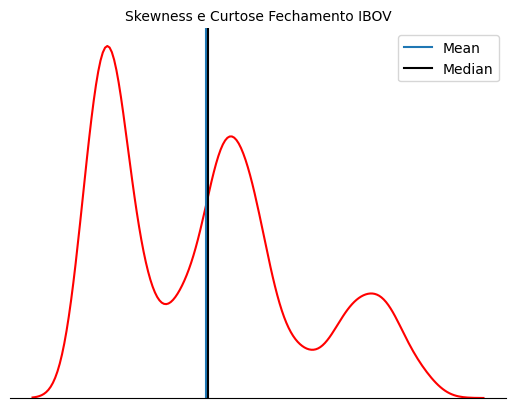

In [130]:
sns.kdeplot(ibov['Close'], color="red")

sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title("Skewness e Curtose Fechamento IBOV", fontdict=dict(fontsize=10))

# Find the mean, median, mode
mean_price = ibov['Close'].mean()
median_price = ibov['Close'].median()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_price, label="Mean")
plt.axvline(median_price, color="black", label="Median")

plt.legend();

# Skweness e Kusrtosis RETORNOS IBOVESPA

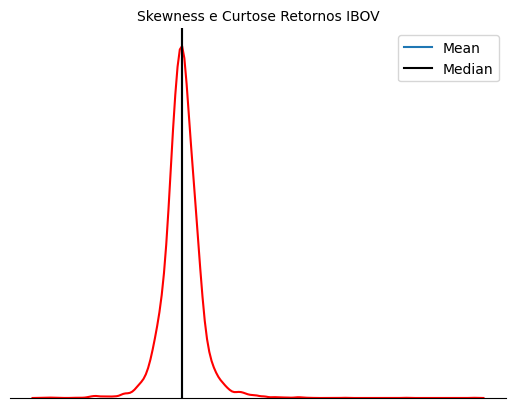

In [133]:
sns.kdeplot(ibov['Returns'], color="red")

sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title("Skewness e Curtose Retornos IBOV", fontdict=dict(fontsize=10))

# Find the mean, median, mode
mean_price = ibov['Returns'].mean()
median_price = ibov['Returns'].median()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_price, label="Mean")
plt.axvline(median_price, color="black", label="Median")

plt.legend();



# *Dividendos PEPSICO(PEP)*

In [180]:
# Defina o ticker da ação para a qual você deseja obter os dados de dividendos
ticker = "PEP"

# Crie um objeto Ticker usando yfinance
pep = yf.Ticker(ticker)

# Obtenha os dados de dividendos
dividendos_pep = pep.dividends

In [181]:
dividendos_pep = pd.DataFrame(dividendos_pep)

In [182]:
dividendos_pep

,Dividends
Date,
1972-06-05 00:00:00-04:00,0.00463
1972-09-01 00:00:00-04:00,0.00463
1972-12-04 00:00:00-05:00,0.00463
1973-03-05 00:00:00-05:00,0.00500
1973-06-04 00:00:00-04:00,0.00500
...,...
2023-03-02 00:00:00-05:00,1.15000
2023-06-01 00:00:00-04:00,1.26500
2023-08-31 00:00:00-04:00,1.26500


In [183]:
# Calculando a soma de dividendos distribuidos
dividendos_pep['soma_divdendos'] = dividendos_pep.Dividends.rolling('365D').sum()

In [186]:
dividendos_pep.head()

,Dividends,soma_divdendos
Date,,
1972-06-05 00:00:00-04:00,0.00463,0.00463
1972-09-01 00:00:00-04:00,0.00463,0.00926
1972-12-04 00:00:00-05:00,0.00463,0.01389
1973-03-05 00:00:00-05:00,0.00500,0.01889
1973-06-04 00:00:00-04:00,0.00500,0.02389


In [189]:
dividendos_pep.tail()

,Dividends,soma_divdendos
Date,,
2023-03-02 00:00:00-05:00,1.150,5.675
2023-06-01 00:00:00-04:00,1.265,5.865
2023-08-31 00:00:00-04:00,1.265,5.980
2023-11-30 00:00:00-05:00,1.265,6.095
2024-02-29 00:00:00-05:00,1.265,6.210


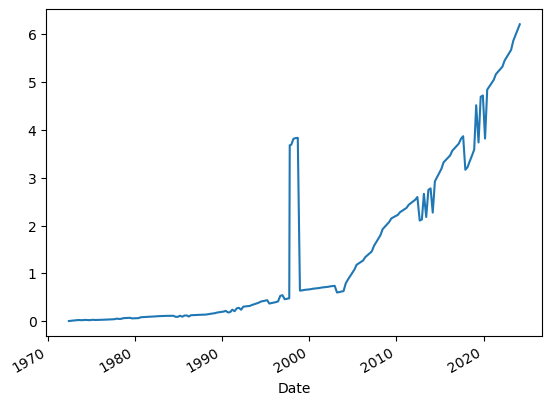

In [185]:
dividendos_pep.soma_divdendos.plot();

In [204]:
dividendos_pep.reset_index(inplace=True)

In [205]:
dividendos_pep

,Date,Dividends,soma_divdendos
0,1972-06-05 00:00:00-04:00,0.00463,0.00463
1,1972-09-01 00:00:00-04:00,0.00463,0.00926
2,1972-12-04 00:00:00-05:00,0.00463,0.01389
3,1973-03-05 00:00:00-05:00,0.00500,0.01889
4,1973-06-04 00:00:00-04:00,0.00500,0.02389
...,...,...,...
204,2023-03-02 00:00:00-05:00,1.15000,5.67500
205,2023-06-01 00:00:00-04:00,1.26500,5.86500
206,2023-08-31 00:00:00-04:00,1.26500,5.98000
207,2023-11-30 00:00:00-05:00,1.26500,6.09500


In [197]:
# Coletando dados de fechamento da Pepsico
pep_close = yf.download('PEP', start = '1972-06-05', end = '2024-03-1')['Close']

[*********************100%%**********************]  1 of 1 completed


In [207]:
pep_close = pd.DataFrame(pep_close)

In [208]:
pep_close.reset_index(inplace=True)

In [211]:
# Equalizando os formatos de data e timezone
dividendos_pep['Date'] = dividendos_pep['Date'].dt.tz_localize(None)

In [212]:
# Juntando os dataframes de Close e Dividendos 
pep_data = pd.merge(pep_close, dividendos_pep, on='Date', how='inner')

In [214]:
pep_data.set_index('Date', inplace = True)

In [220]:
# Renomeando colunas
pep_data.rename(columns = {'soma_divdendos':'Soma_Dividendos'}, inplace = True)

In [222]:
#Calculando Dividend Yield
pep_data['DY'] = pep_data['Soma_Dividendos']/pep_data['Close'] * 100

In [223]:
pep_data

,Close,Dividends,Soma_Dividendos,DY
Date,,,,
1972-06-05,1.574074,0.00463,0.00463,0.294141
1972-09-01,1.608796,0.00463,0.00926,0.575586
1972-12-04,1.618056,0.00463,0.01389,0.858438
1973-03-05,1.550926,0.00500,0.01889,1.217982
1973-06-04,1.490741,0.00500,0.02389,1.602559
...,...,...,...,...
2023-03-02,173.320007,1.15000,5.67500,3.274290
2023-06-01,182.190002,1.26500,5.86500,3.219167
2023-08-31,177.919998,1.26500,5.98000,3.361061


In [ ]:
# Removendo dias em que não houve pagamentos de dividendos

In [224]:
pep_data = pep_data[pep_data['Dividends']!=0]

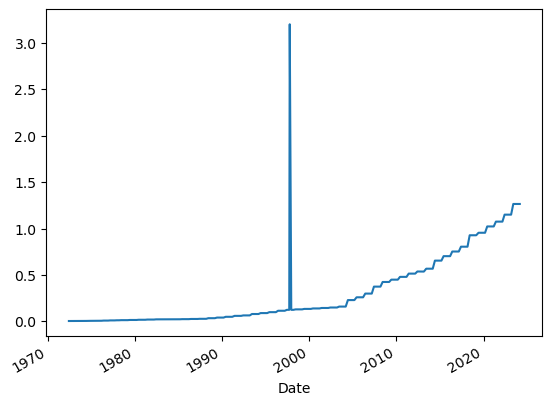

In [225]:
pep_data.Dividends.plot();

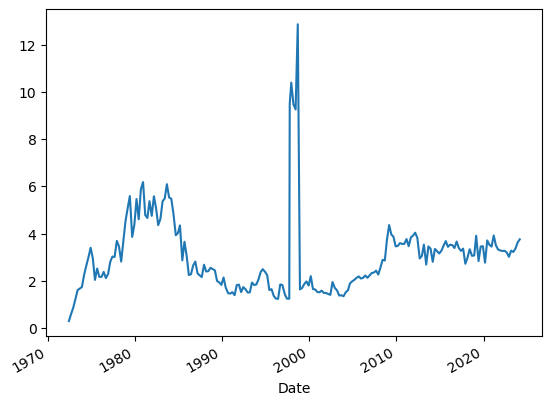

In [226]:
pep_data.DY.plot();

In [227]:
np.mean(pep_data.DY)

3.0129740679332597

In [228]:
np.median(pep_data.DY)

2.8011342410346853

C:\Users\Pc\AppData\Local\Temp\ipykernel_9180\3181330127.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




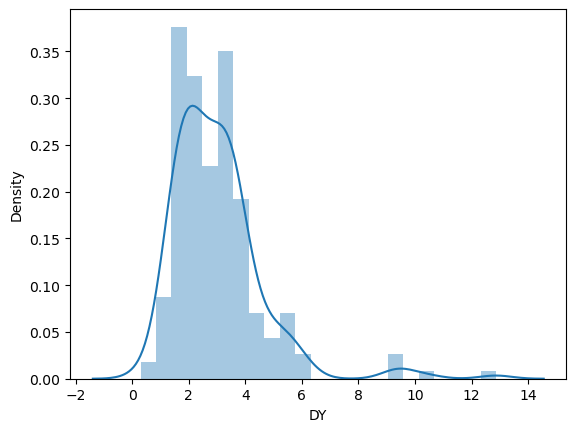

In [230]:
sns.distplot(pep_data.DY, hist=True, kde=True);

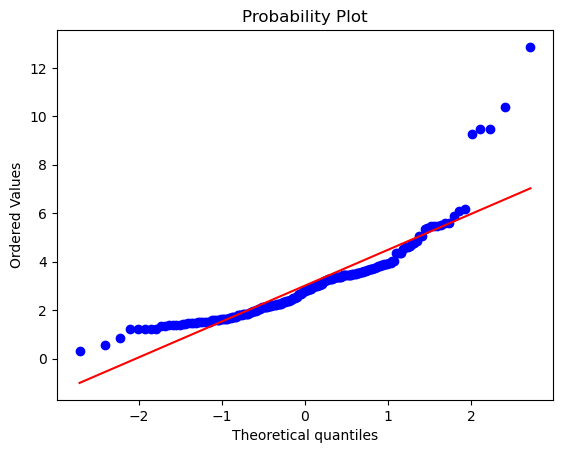

In [231]:
stats.probplot(pep_data.DY, dist="norm", plot=pylab)
pylab.show()

---

<br>

## *Dividend Yield de PEP foi maior nos períodos onde o preço da ação estava maior?*

<br>


---

In [233]:
fig_04 = px.scatter(x=pep_data.Close, y=pep_data.DY, width=500)

fig_04.update_layout(width=500, height=500, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False, xaxis_title='<b>Preço PEPSICO (R$)', yaxis_title='<b>DY PEPSICO (%)')

fig_04.show()

# *Testes de Correlação*

<br>

A correlação é uma medida estatística que descreve a relação entre duas variáveis. Ela indica o grau e a direção do relacionamento linear entre duas variáveis.

### Correlação de Pearson

<br>

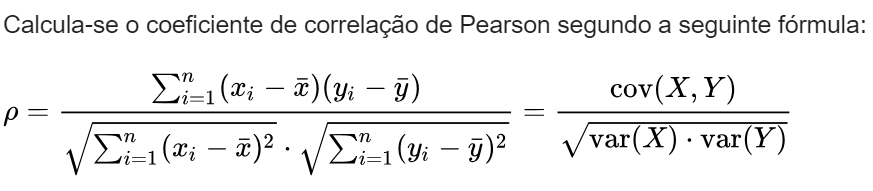


<br>

A correlação de Pearson, nomeada após Karl Pearson, é uma medida estatística que quantifica o grau e a direção da relação linear entre duas variáveis contínuas. É uma das medidas mais comuns de correlação e é representada pelo coeficiente de correlação de Pearson (r).

<br>

- **Se r = 1** isso indica uma correlação positiva perfeita, o que significa que as duas variáveis estão perfeitamente correlacionadas de forma positiva. À medida que uma variável aumenta, a outra também aumenta em proporção constante.

<br>

- Se **r = -1** isso indica uma correlação negativa perfeita, o que significa que as duas variáveis estão perfeitamente correlacionadas de forma negativa. À medida que uma variável aumenta, a outra diminui em proporção constante.

<br>

- Se **r = 0** isso indica que não há correlação linear entre as duas variáveis.


In [237]:
corr, p = stats.pearsonr(pep_data.Close, pep_data.DY)
print('==============' * 4)
print('-> Correlação de Pearson: r=%.3f' %corr, 'p=%.3f' %p)
print('==============' * 4)

-> Correlação de Pearson: r=0.043 p=0.535


### Correlação de Spearman

<br>

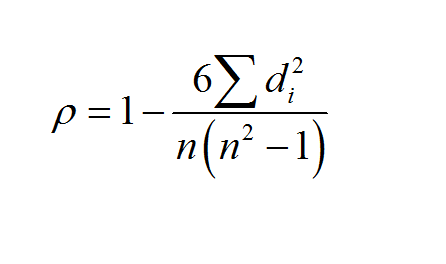


<br>


A correlação de Spearman é uma medida estatística que avalia a relação entre duas variáveis, sem assumir que as variáveis têm uma distribuição normal ou uma relação linear. Em vez disso, a correlação de Spearman avalia a relação monotônica entre as variáveis, ou seja, se as variáveis tendem a mudar juntas, mas não necessariamente em uma taxa constante.

<br>

- Se **ρ=1** isso indica uma correlação positiva perfeita, o que significa que as duas variáveis estão perfeitamente correlacionadas de forma positiva em uma relação monotônica crescente.

<br>

- Se **ρ=−1** isso indica uma correlação negativa perfeita, o que significa que as duas variáveis estão perfeitamente correlacionadas de forma negativa em uma relação monotônica decrescente.

<br>

- Se **ρ=0** isso indica que não há correlação monotônica entre as duas variáveis.

<br>

**Correlação de Spearman é não-paramétrica e não assume distribuição normal**

In [238]:
corr, p = stats.spearmanr(pep_data.Close, pep_data.DY)
print('==============' * 4)
print('-> Correlação de Spearman: r=%.3f' %corr, 'p=%.3f' %p)
print('==============' * 4)

-> Correlação de Spearman: r=0.067 p=0.339


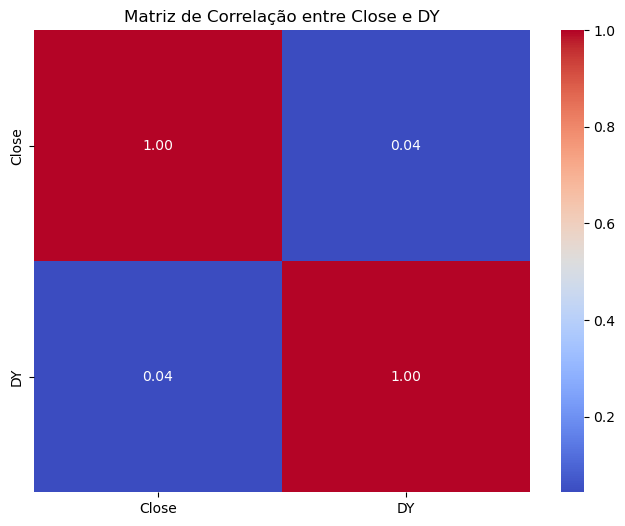

In [239]:
# Calculando a matriz de correlação
correlation_matrix = pep_data[['Close', 'DY']].corr()

# Criando o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Close e DY')
plt.show()

# *Arbitragem em ações*

In [241]:
ativos = ['PETR3.SA','PETR4.SA']

spread = yf.download(ativos, period = 'max')['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [242]:
spread

Ticker,PETR3.SA,PETR4.SA
Date,,
2000-01-03,1.463578,1.548587
2000-01-04,1.381438,1.462920
2000-01-05,1.400107,1.448159
2000-01-06,1.388906,1.443151
2000-01-07,1.400107,1.449741
...,...,...
2024-03-04,41.049999,40.080002
2024-03-05,40.799999,39.959999
2024-03-06,41.500000,40.840000


In [243]:
spread.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29',
               '2024-03-01', '2024-03-04', '2024-03-05', '2024-03-06',
               '2024-03-07', '2024-03-08'],
              dtype='datetime64[ns]', name='Date', length=6073, freq=None)

In [244]:
spread.index = pd.to_datetime(spread.index, utc = True)

In [245]:
spread.index

DatetimeIndex(['2000-01-03 00:00:00+00:00', '2000-01-04 00:00:00+00:00',
               '2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-10 00:00:00+00:00',
               '2000-01-11 00:00:00+00:00', '2000-01-12 00:00:00+00:00',
               '2000-01-13 00:00:00+00:00', '2000-01-14 00:00:00+00:00',
               ...
               '2024-02-26 00:00:00+00:00', '2024-02-27 00:00:00+00:00',
               '2024-02-28 00:00:00+00:00', '2024-02-29 00:00:00+00:00',
               '2024-03-01 00:00:00+00:00', '2024-03-04 00:00:00+00:00',
               '2024-03-05 00:00:00+00:00', '2024-03-06 00:00:00+00:00',
               '2024-03-07 00:00:00+00:00', '2024-03-08 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=6073, freq=None)

In [246]:
# Calculando o Spread entre as duas ações 
spread['ratio'] = round(spread['PETR4.SA']/spread['PETR3.SA'], 3)

In [247]:
spread.head()

Ticker,PETR3.SA,PETR4.SA,ratio
Date,,,
2000-01-03 00:00:00+00:00,1.463578,1.548587,1.058
2000-01-04 00:00:00+00:00,1.381438,1.462920,1.059
2000-01-05 00:00:00+00:00,1.400107,1.448159,1.034
2000-01-06 00:00:00+00:00,1.388906,1.443151,1.039
2000-01-07 00:00:00+00:00,1.400107,1.449741,1.035


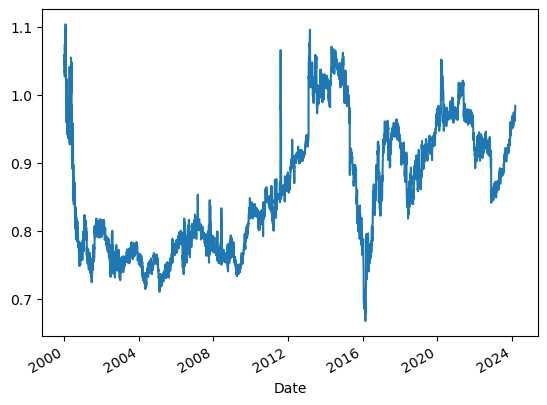

In [248]:
spread.ratio.plot();

In [249]:
# Calculando os Spreads com base no desvio padrão 
media_spread = round(np.mean(spread.ratio),3)
um_desvio_min_spread = media_spread - round(np.std(spread.ratio),3)
um_desvio_max_spread = media_spread + round(np.std(spread.ratio),3)
dois_desvios_min_spread = media_spread - (2* (round(np.std(spread.ratio),3)))
dois_desvios_max_spread = media_spread + (2* (round(np.std(spread.ratio),3)))

In [259]:
fig = px.line(spread, x=spread.index, y=spread.ratio)

fig.add_hline(y=media_spread, line_width=5, line_color="green")
fig.add_hline(y=um_desvio_min_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=um_desvio_max_spread, line_width=3, line_dash="dash", line_color="orange")
fig.add_hline(y=dois_desvios_min_spread, line_width=5, line_dash="dash", line_color="red")
fig.add_hline(y=dois_desvios_max_spread, line_width=5, line_dash="dash", line_color="red")

fig.update_layout(xaxis_rangeslider_visible=False, title_text='Spread (razão) entre preço PETR4 e PETR3 (2000 e mar/2024)',
                  paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=70, b=20),
                  template = 'simple_white',width=900,height=500)
fig.show()